In [1]:
print("Hello World!")

Hello World!


In [1]:
clear

In [2]:
import tensorflow as tf

In [3]:
import keras


Using TensorFlow backend.


In [4]:
import pandas

In [5]:
import sklearn


In [6]:
import matplotlib

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...
Train...
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 418s 17ms/step - loss: 0.4554 - acc: 0.7881 - val_loss: 0.3937 - val_acc: 0.8300
Epoch 2/15
25000/25000 [==============================] - 399s 16ms/step - loss: 0.3034 - acc: 0.8777 - val_loss: 0.3627 - val_acc: 0.8446
Epoch 3/15
25000/25000 [==============================] - 392s 16ms/step - loss: 0.2198 - acc: 0.9150 - val_loss: 0.4580 - val_acc: 0.8243
Epoch 4/15
25000/25000 [==============================] - 390s 16ms/step - loss: 0.1561 - acc: 0.9430 - val_loss: 0.4677 - val_acc: 0.8384
Epoch 5/15
25000/25000 [==============================] - 394s 16ms/step - loss: 0.1205 - acc: 0.9567 - val_loss: 0.5436 - val_acc: 0.8328
Epoch 6/15
25000/25000 [==============================] - 389s 16ms/step - loss: 0.085

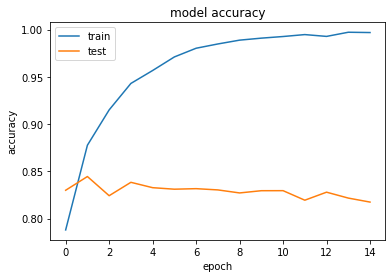

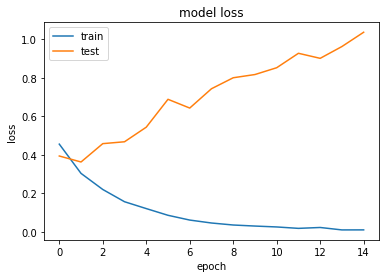

Saved trained model at /Users/orelmuseri1/Intuitive Deep Learning Tutorial/saved_models/keras_imbd_lstm_trained_model.h5 
25000/25000 [==============================] - 70s 3ms/step
Test score: 1.0369873270210623
Test accuracy: 0.81752


In [19]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import matplotlib.pyplot as plt
import os

max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)
batch_size = 32
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_imbd_lstm_trained_model.h5'
print('Loading data...')
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# restore np.load for future normal usage
np.load = np_load_old

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)
